In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
train_df = pd.read_csv('/root/tempfile/train_final121201.csv')
test_df = pd.read_csv('/root/tempfile/test_final121201.csv')

In [10]:
print(train_df.shape, test_df.shape)

(201917, 191) (123623, 190)


In [11]:
feature_col = [x for x in train_df.columns if x not in ['card_id','target']]
y_train = train_df.target.values.astype('float')
x_train = train_df[feature_col].values.astype('float')
x_test = test_df[feature_col].values.astype('float')

In [12]:
testindex = test_df.card_id

In [13]:
del train_df, test_df

In [ ]:
c_label = ['feature_1',
           'feature_2',
           'feature_3',
           'auth_city_id_cal_mode',
           'auth_merchant_category_id_cal_mode',
           'auth_merchant_id_cal_mode',
           'auth_state_id_cal_mode',
           'auth_subsector_id_cal_mode',
           'auth_dayofweek_cal_mode',
           'unauth_city_id_cal_mode',
           'unauth_merchant_category_id_cal_mode',
           'unauth_merchant_id_cal_mode',
           'unauth_state_id_cal_mode',
           'unauth_subsector_id_cal_mode',
           'unauth_dayofweek_cal_mode',
           'new_city_id_cal_mode',
           'new_merchant_category_id_cal_mode',
           'new_merchant_id_cal_mode',
           'new_state_id_cal_mode',
           'new_subsector_id_cal_mode',
           'new_dayofweek_cal_mode']

In [6]:
lgb_model = lgb.LGBMRegressor(objective='regression',
                              min_data_in_leaf=20,
                              num_leaves=50,
                              learning_rate=0.1, 
                              n_estimators=43, 
                              max_depth=8,
                              metric='rmse',
                              bagging_fraction = 0.8,
                              feature_fraction = 0.8)

In [9]:


params_test1={
    'max_depth': range(6,14,2),
    'num_leaves':range(50, 150, 30),
    'min_data_in_leaf':range(20,200,20)
}
gsearch1 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test1,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=8)

gs1 = gsearch1.fit(x_train, y_train)#feature_name=feature_col, categorical_feature=c_label)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  8.6min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 23.0min
[Parallel(n_jobs=8)]: Done 720 out of 720 | elapsed: 40.2min finished


In [10]:
print(gs1.best_params_, gs1.best_score_)

{'max_depth': 8, 'min_data_in_leaf': 180, 'num_leaves': 140} -13.409611004811335


In [13]:
params_test2={
    'max_depth': range(7,11,2),
    'num_leaves':range(100, 200, 20),
    'min_data_in_leaf':range(100,300,20)
}
gsearch2 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test2,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=8)

gs1 = gsearch2.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 10.1min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 25.8min
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed: 30.1min finished


In [14]:
print(gs2.best_params_, gs2.best_score_)

{'max_depth': 9, 'min_data_in_leaf': 200, 'num_leaves': 180} -13.400771642719123


In [8]:
params_test3={
    'max_depth': range(7,13,2),
    'num_leaves':range(160, 260, 20),
    'min_data_in_leaf':range(160,300,20)
}
gsearch3 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test3,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=8)

gs3 = gsearch3.fit(x_train, y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 10.1min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 28.4min
[Parallel(n_jobs=8)]: Done 525 out of 525 | elapsed: 35.7min finished


In [9]:
print(gs3.best_params_, gs3.best_score_)

{'max_depth': 9, 'min_data_in_leaf': 200, 'num_leaves': 180} -13.400771642719123


In [8]:
params_test4={
    'max_depth': range(8,11,1),
    'num_leaves':range(160, 200, 5),
    'min_data_in_leaf':range(180,220, 5)
}
gsearch4 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test4,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=8)

gs4 = gsearch4.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 11.4min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 27.5min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 52.6min
[Parallel(n_jobs=8)]: Done 960 out of 960 | elapsed: 65.8min finished


In [9]:
print(gs4.best_params_, gs4.best_score_)

{'max_depth': 9, 'min_data_in_leaf': 195, 'num_leaves': 175} -13.39571399988497


In [7]:
params_test5={
    'max_depth': range(8,11,1),
    'num_leaves':range(169, 182, 2),
    'min_data_in_leaf':range(191,203, 2)
}
gsearch5 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test5,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=8)

gs5 = gsearch5.fit(x_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 11.4min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 28.6min
[Parallel(n_jobs=8)]: Done 630 out of 630 | elapsed: 43.3min finished


In [8]:
print(gs5.best_params_, gs5.best_score_)

{'max_depth': 9, 'min_data_in_leaf': 195, 'num_leaves': 175} -13.39571399988497


In [9]:
params_test6={
    'max_depth': [8, 9, 10],
    'num_leaves':[174, 175, 176],
    'min_data_in_leaf':[194,195,196]
}
gsearch6 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test6,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=8)

gs6 = gsearch6.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 135 out of 135 | elapsed:  9.4min finished


In [10]:
print(gs6.best_params_, gs6.best_score_)

{'max_depth': 9, 'min_data_in_leaf': 195, 'num_leaves': 175} -13.39571399988497


In [13]:
params_test7={
    'max_depth': [9],
    'num_leaves':[175],
    'min_data_in_leaf':[195],
}
gsearch7 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test7,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=8)

gs7 = gsearch7.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.8min
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:  8.4min finished


In [14]:
print(gs6.best_params_, gs6.best_score_)

{'max_depth': 9, 'min_child_samples': 18, 'min_child_weight': 0.001, 'min_data_in_leaf': 195, 'num_leaves': 175} -13.39571399988497


In [21]:
params_test8={
    'max_depth': [9],
    'num_leaves':[175],
    'min_data_in_leaf':[195],         
    "feature_fraction": np.arange(0.5,1,0.02)
}
gsearch8 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test8,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=8)

gs8 = gsearch8.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=8)]: Done 125 out of 125 | elapsed:  8.5min finished


In [22]:
print(gs8.best_params_, gs8.best_score_)

{'feature_fraction': 0.8000000000000003, 'max_depth': 9, 'min_data_in_leaf': 195, 'num_leaves': 175} -13.39571399988497


In [23]:
params_test9={
    'max_depth': [9],
    'num_leaves':[175],
    'min_data_in_leaf':[195],
    'feature_fraction': [0.8],
    'reg_alpha': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5],   
    'reg_lambda': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5]
}
gsearch9 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test9,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=8)

gs9 = gsearch9.fit(x_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.8min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 13.0min
[Parallel(n_jobs=8)]: Done 245 out of 245 | elapsed: 17.3min finished


In [24]:
print(gs9.best_params_, gs9.best_score_)

{'feature_fraction': 0.8, 'max_depth': 9, 'min_data_in_leaf': 195, 'num_leaves': 175, 'reg_alpha': 0.001, 'reg_lambda': 0.001} -13.395713961865933


In [7]:
params_test10={
    'max_depth': [9],
    'num_leaves':[175],
    'min_data_in_leaf':[195],
    'feature_fraction': [0.8],
    'reg_alpha': [0, 0.001, 0.002],   
    'reg_lambda': [0, 0.001, 0.002]
}
gsearch10 = GridSearchCV(estimator=lgb_model, 
                        param_grid=params_test10,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=8)

gs10 = gsearch10.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  45 out of  45 | elapsed:  3.4min finished


In [8]:
print(gs10.best_params_, gs10.best_score_)

{'feature_fraction': 0.8, 'max_depth': 9, 'min_data_in_leaf': 195, 'num_leaves': 175, 'reg_alpha': 0.002, 'reg_lambda': 0.002} -13.395713924167879


In [15]:
params_test11={
    'max_depth': [9],
    'num_leaves':[175],
    'min_data_in_leaf':[195],
    'feature_fraction': [0.8],
    'reg_alpha': [0.002],   
    'reg_lambda': [0.002],
    'learning_rate':[0.001],
    'num_iterations':[750,1000,2000,3000,5000]
}

lgb_model1 = lgb.LGBMRegressor(objective='regression',
                              min_data_in_leaf=20,
                              num_leaves=50,
                              num_iterations=100,
                              learning_rate=0.1, 
                              n_estimators=43, 
                              max_depth=8,
                              metric='rmse',
                              bagging_fraction = 0.8,
                              num_threads=4,
                              feature_fraction = 0.8)

gsearch11 = GridSearchCV(estimator=lgb_model1, 
                        param_grid=params_test11,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=2)

gs11 = gsearch11.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  25 out of  25 | elapsed: 75.7min finished
/root/anaconda3/envs/jupyter/lib/python3.7/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [16]:
print(gs11.best_params_, gs11.best_score_)

{'feature_fraction': 0.8, 'learning_rate': 0.001, 'max_depth': 9, 'min_data_in_leaf': 195, 'num_iterations': 5000, 'num_leaves': 175, 'reg_alpha': 0.002, 'reg_lambda': 0.002} -13.370203867513144


In [17]:
gs11.cv_results_['mean_test_score']

array([-13.84058415, -13.70951883, -13.48139217, -13.4087802 ,
       -13.37020387])

In [7]:
params_test11={
    'max_depth': [9],
    'num_leaves':[175],
    'min_data_in_leaf':[195],
    'feature_fraction': [0.8],
    'reg_alpha': [0.002],   
    'reg_lambda': [0.002],
    'learning_rate':[0.001],
    'num_iterations':[10000]
}

lgb_model1 = lgb.LGBMRegressor(objective='regression',
                              min_data_in_leaf=20,
                              num_leaves=50,
                              num_iterations=100,
                              learning_rate=0.1, 
                              n_estimators=43, 
                              max_depth=8,
                              metric='rmse',
                              bagging_fraction = 0.8,
                              #,
                              feature_fraction = 0.8)

gsearch11 = GridSearchCV(estimator=lgb_model1, 
                        param_grid=params_test11,
                        scoring='neg_mean_squared_error', 
                        cv=5,
                        verbose=1, 
                        n_jobs=4)

gs11 = gsearch11.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 146.4min finished
/root/anaconda3/envs/jupyter/lib/python3.7/site-packages/lightgbm/engine.py:113: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [8]:
gs11.cv_results_['mean_test_score']

array([-13.36613603])

In [12]:
y_test = gs11.predict(x_test)

In [14]:
spt = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

params_test11={
    'max_depth': 9,
    'num_leaves':175,
    'min_data_in_leaf':195,
    'reg_alpha': 0.002,   
    'reg_lambda': 0.002,
    'learning_rate':0.001,
    'bagging_fraction' : 0.8,
    'feature_fraction' : 0.8,
    'objective':'regression',
    'metric':'rmse'
}

data_train = lgb.Dataset(spt[0], spt[2], silent=True)
data_test = lgb.Dataset(spt[1], spt[3], silent=True)

lgb_model = lgb.train(
    params_test11,
    data_train,
    valid_sets=[data_test, data_train],
    num_boost_round=20000, 
    early_stopping_rounds=200,
    verbose_eval=100)

Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 3.81673	valid_0's rmse: 3.81526
[200]	training's rmse: 3.78653	valid_0's rmse: 3.78996
[300]	training's rmse: 3.76051	valid_0's rmse: 3.76889
[400]	training's rmse: 3.7378	valid_0's rmse: 3.75094
[500]	training's rmse: 3.71761	valid_0's rmse: 3.73588
[600]	training's rmse: 3.69995	valid_0's rmse: 3.72339
[700]	training's rmse: 3.68405	valid_0's rmse: 3.71284
[800]	training's rmse: 3.66943	valid_0's rmse: 3.70376
[900]	training's rmse: 3.65641	valid_0's rmse: 3.69627
[1000]	training's rmse: 3.64432	valid_0's rmse: 3.68926
[1100]	training's rmse: 3.63342	valid_0's rmse: 3.68351
[1200]	training's rmse: 3.62332	valid_0's rmse: 3.6786
[1300]	training's rmse: 3.61376	valid_0's rmse: 3.67425
[1400]	training's rmse: 3.60498	valid_0's rmse: 3.67037
[1500]	training's rmse: 3.59687	valid_0's rmse: 3.6671
[1600]	training's rmse: 3.58912	valid_0's rmse: 3.6642
[1700]	training's rmse: 3.58202	valid_0's rmse: 3.6617

In [ ]:
6700

In [15]:
feature_importance = lgb_model.feature_importance()

In [16]:
importance_df = pd.DataFrame({'importance':feature_importance,'name':feature_col})

In [17]:
importance_df.shape

(189, 2)

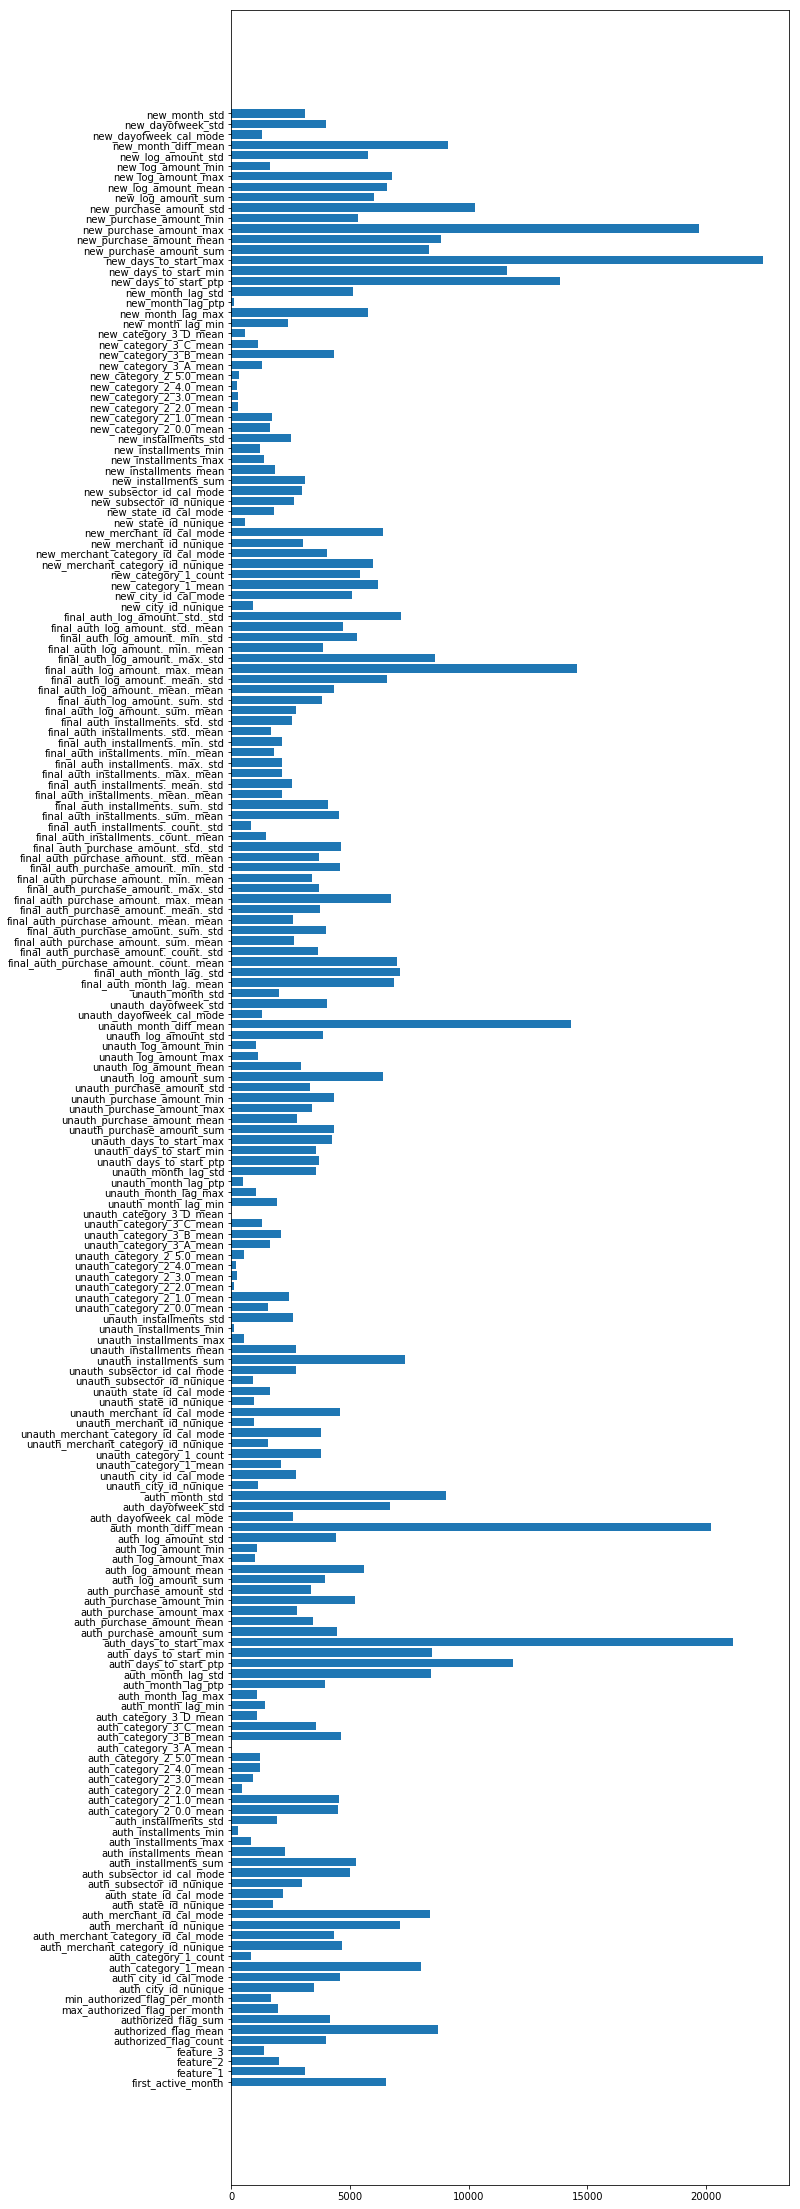

In [18]:
plt.figure(figsize=[10,40])
plt.barh(importance_df.name, importance_df.importance)
plt.show()

In [19]:
y_test = lgb_model.predict(x_test)

In [20]:
submission = pd.DataFrame({'card_id':testindex, 'target':y_test})

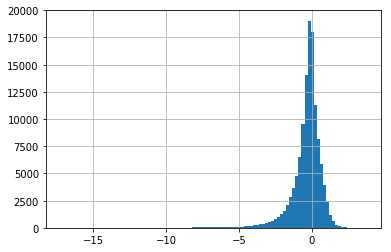

In [22]:
submission.target.hist(bins=100)

In [54]:
submission.to_csv('/root/tempfile/submission121402.csv',index=False)